# Phishing URL Detection

### Check Whether website is Phishing Website or Not

In [1]:
#importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


# Exploring the Dataset

In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


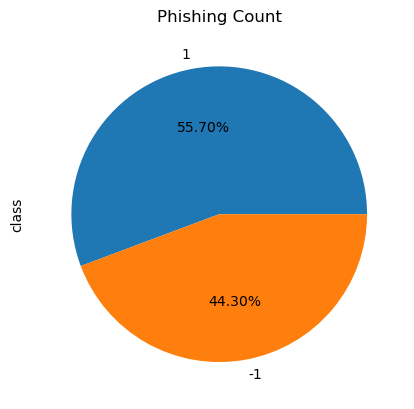

In [9]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

# Feature Selection

In [10]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [12]:
lr = LogisticRegression()

In [13]:
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [14]:
# Print the optimal number of features
print('Optimal number of features:', rfecv.n_features_)

# Print the selected features
print('Selected Features:', X.columns[rfecv.support_])

Optimal number of features: 18
Selected Features: Index(['UsingIP', 'ShortURL', 'PrefixSuffix-', 'SubDomains', 'HTTPS',
       'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail',
       'WebsiteForwarding', 'DNSRecording', 'WebsiteTraffic', 'GoogleIndex',
       'LinksPointingToPage', 'StatsReport'],
      dtype='object')


In [15]:
# Use the selected features to train the logistic regression classifier
X = X[X.columns[rfecv.support_]]
print(X)

       UsingIP  ShortURL  PrefixSuffix-  SubDomains  HTTPS  Favicon  \
0            1         1             -1           0      1        1   
1            1         1             -1          -1     -1        1   
2            1         1             -1          -1     -1        1   
3            1        -1             -1           1      1        1   
4           -1        -1             -1           1      1        1   
...        ...       ...            ...         ...    ...      ...   
11049        1         1              1           1      1       -1   
11050       -1         1             -1           1     -1       -1   
11051        1         1             -1           1     -1        1   
11052       -1         1             -1          -1     -1       -1   
11053       -1         1             -1          -1     -1        1   

       NonStdPort  HTTPSDomainURL  AnchorURL  LinksInScriptTags  \
0               1              -1          0                 -1   
1            

# Model Building

In [16]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 18), (8843,), (2211, 18), (2211,))

In [17]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## K-Nearest Neighbors Classifier

In [18]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred1 = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
cm

array([[ 917,   59],
       [  73, 1162]], dtype=int64)

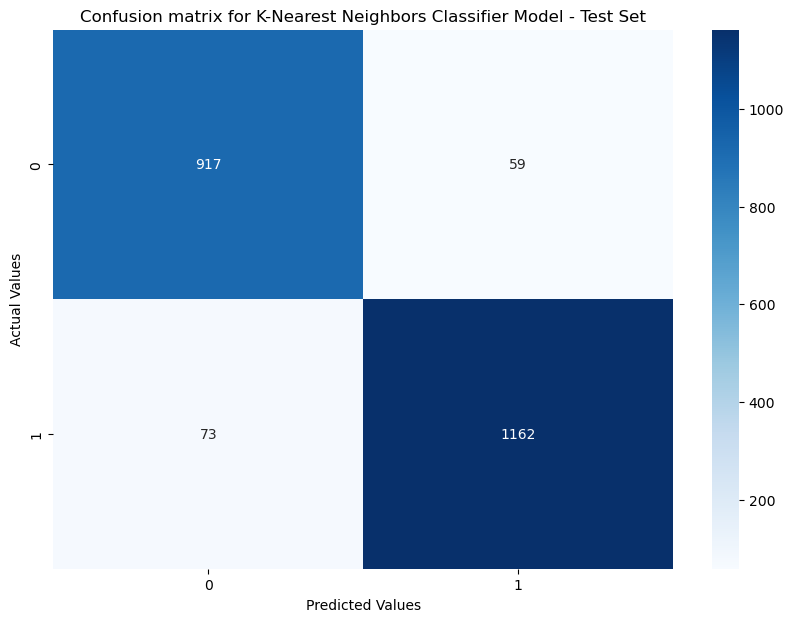

In [20]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for K-Nearest Neighbors Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [21]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [22]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.955
K-Nearest Neighbors : Accuracy on test Data: 0.940

K-Nearest Neighbors : f1_score on training Data: 0.960
K-Nearest Neighbors : f1_score on test Data: 0.946

K-Nearest Neighborsn : Recall on training Data: 0.964
Logistic Regression : Recall on test Data: 0.941

K-Nearest Neighbors : precision on training Data: 0.956
K-Nearest Neighbors : precision on test Data: 0.952


In [23]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.93      0.94      0.93       976
           1       0.95      0.94      0.95      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



In [24]:
# Creating a confusion matrix for training set
y_train_pred = knn.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[3705,  216],
       [ 178, 4744]], dtype=int64)

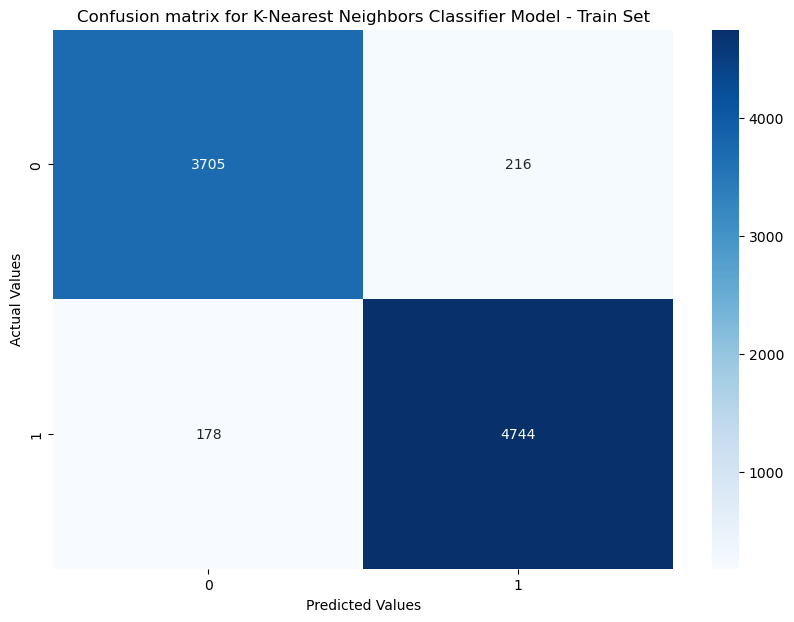

In [25]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for K-Nearest Neighbors Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [27]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## Decision Tree Classifier

In [28]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=18)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18)

In [29]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [30]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 924,   52],
       [  49, 1186]], dtype=int64)

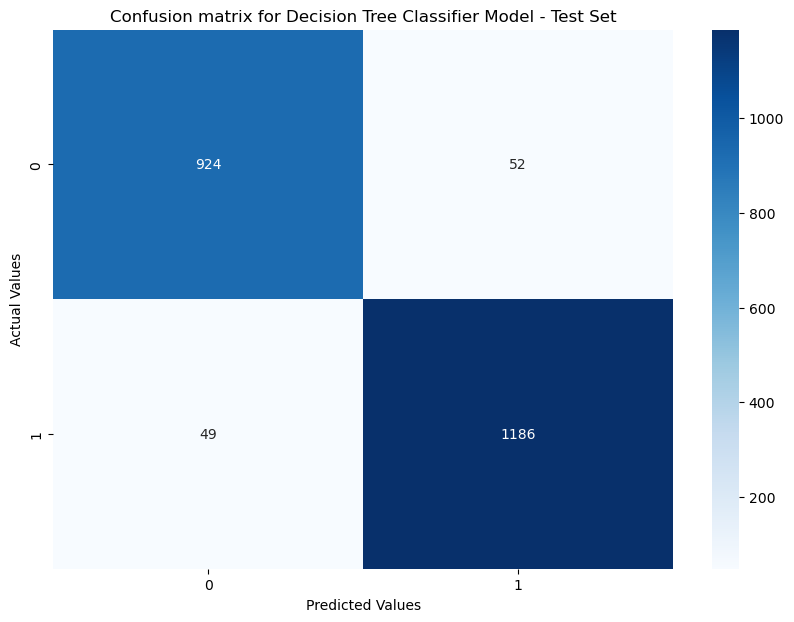

In [31]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [32]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.977
Decision Tree : Accuracy on test Data: 0.954

Decision Tree : f1_score on training Data: 0.979
Decision Tree : f1_score on test Data: 0.959

Decision Tree : Recall on training Data: 0.981
Decision Tree : Recall on test Data: 0.960

Decision Tree : precision on training Data: 0.977
Decision Tree : precision on test Data: 0.958


In [33]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [34]:
# Creating a confusion matrix for training set
y_train_pred = tree.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[3808,  113],
       [  93, 4829]], dtype=int64)

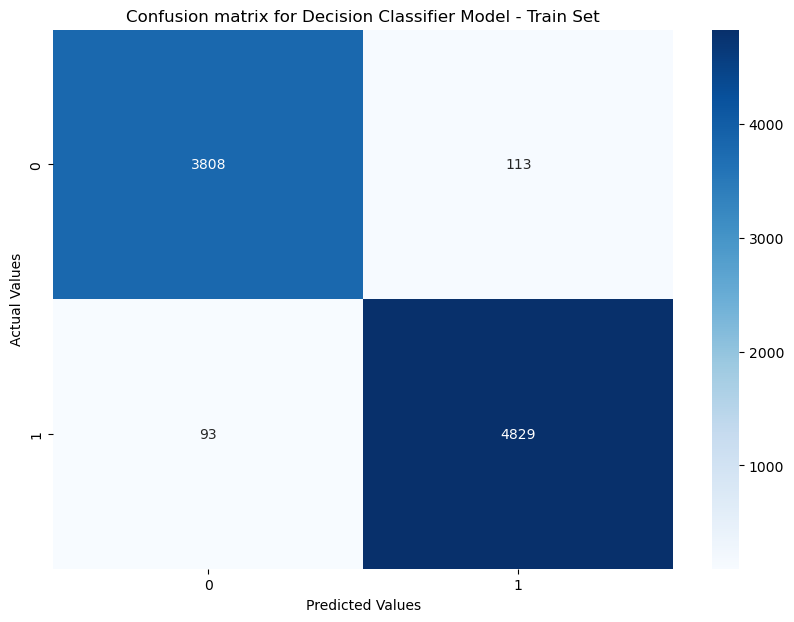

In [35]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [37]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## Random Forest Classifier

In [38]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=50)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [39]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [40]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred1 = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
cm

array([[ 926,   50],
       [  41, 1194]], dtype=int64)

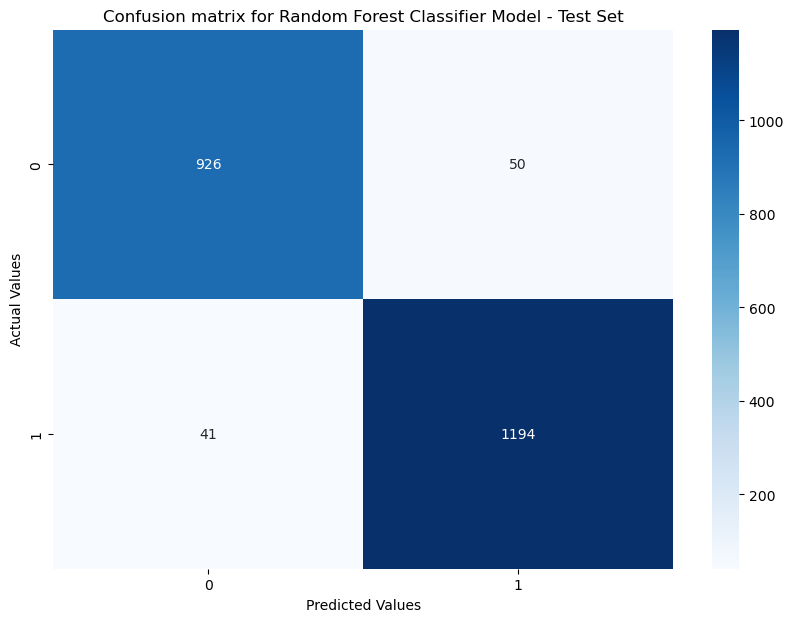

In [41]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [42]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.977
Random Forest : Accuracy on test Data: 0.959

Random Forest : f1_score on training Data: 0.979
Random Forest : f1_score on test Data: 0.963

Random Forest : Recall on training Data: 0.983
Random Forest : Recall on test Data: 0.967

Random Forest : precision on training Data: 0.975
Random Forest : precision on test Data: 0.958


In [43]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       976
           1       0.96      0.97      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [44]:
# Creating a confusion matrix for training set
y_train_pred = forest.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[3797,  124],
       [  82, 4840]], dtype=int64)

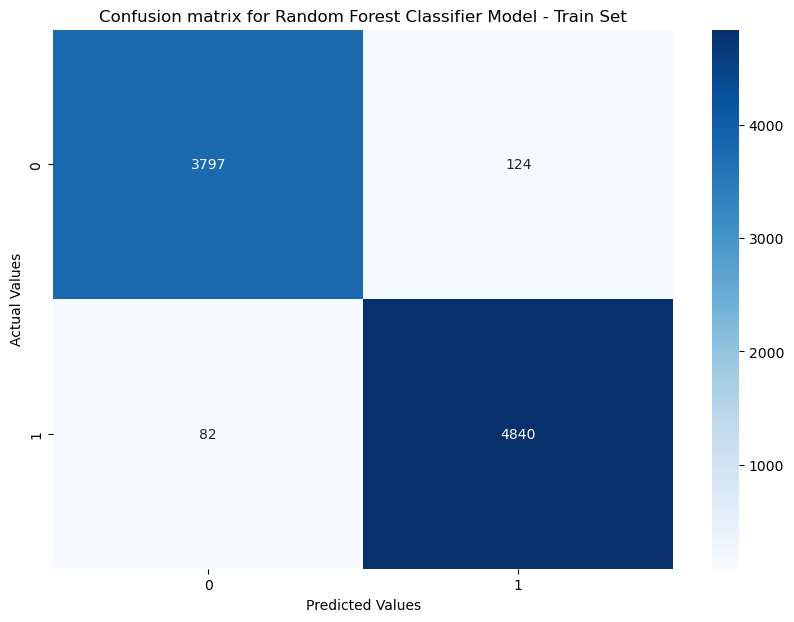

In [45]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [47]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

# Comparing All Model

In [48]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,K-Nearest Neighbors,0.940,0.946,0.964,0.956
1,Decision Tree,0.954,0.959,0.981,0.977
2,Random Forest,0.959,0.963,0.983,0.975


In [49]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [50]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.959,0.963,0.983,0.975
1,Decision Tree,0.954,0.959,0.981,0.977
2,K-Nearest Neighbors,0.940,0.946,0.964,0.956


# Importing Best Model

In [51]:
# save Random Forest model to file

import pickle
pickle.dump(forest, open("RandomForestClassifier.pkl", "wb"))

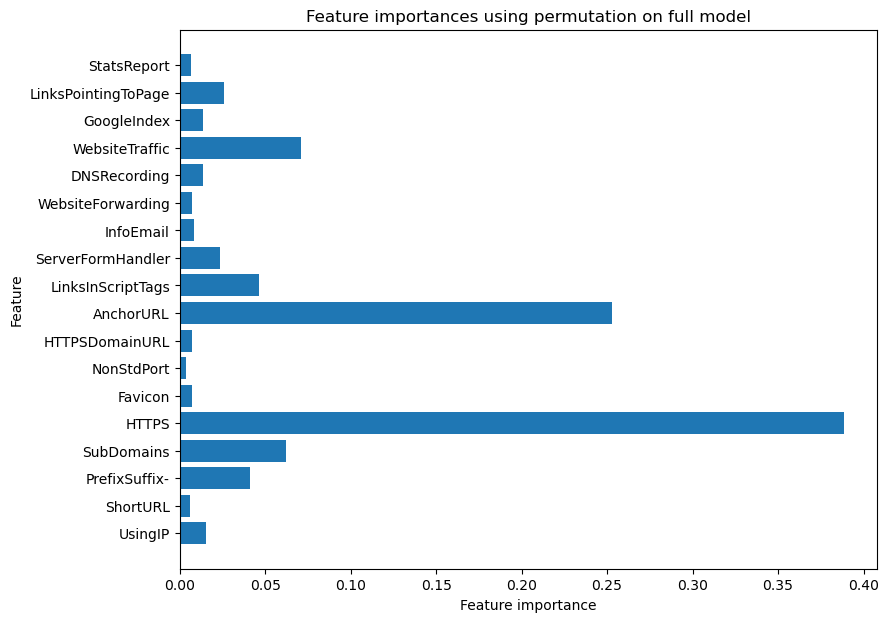

In [52]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()